In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, auc
from sklearn.metrics import accuracy_score, roc_curve

In [4]:
# Import data and split into train/test sets
news_df = pd.read_csv('../data/news_classification.csv')
xFeat = news_df.drop('high_popularity', axis=1)
y = news_df['high_popularity']
xTrain, xTest, yTrain, yTest = train_test_split(xFeat, y, test_size=0.3, random_state=42)

In [16]:
# Baseline model accuracies
models = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
]

accuracies = []
for model in models:
    model.fit(xTrain, yTrain)
    y_pred = model.predict(xTest)
    accuracy = accuracy_score(yTest, y_pred)
    accuracies.append((model.__class__.__name__, accuracy))

for model_name, accuracy in accuracies:
    print(f"{model_name}: {accuracy}")

RandomForestClassifier: 0.6985091634222771
GradientBoostingClassifier: 0.7119931630424461
AdaBoostClassifier: 0.7040167125629095


In [20]:
# Arbitrary values, GridSearchCV with these ranges too computationally intensive
best_nest = 100
best_maxDepth = 10
best_minSamplesLeaf = 10
best_criterion = 'gini'

In [21]:
# KFold cross validation subsets
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

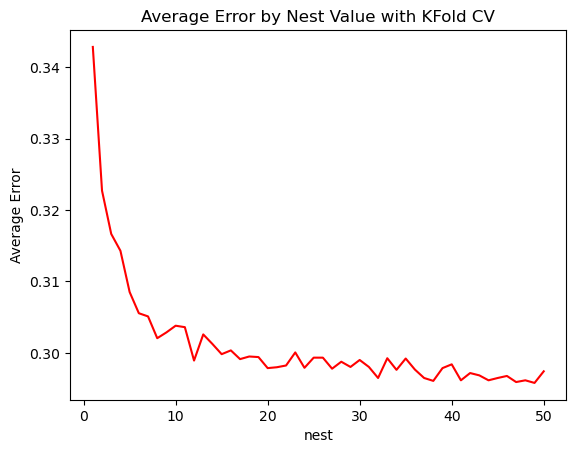

In [25]:
nest_values = range(1, 51)
average_nest_errors = []

for nest in nest_values:
    errors = []
    for train_index, test_index in kf.split(xTrain):
        # Subset Kfold data
        xTrain_fold, xTest_fold = xTrain.iloc[train_index], xTrain.iloc[test_index]
        yTrain_fold, yTest_fold = yTrain.iloc[train_index], yTrain.iloc[test_index]

        model = RandomForestClassifier(n_estimators=nest, criterion=best_criterion, max_depth=best_maxDepth, min_samples_leaf=best_minSamplesLeaf)
        model.fit(xTrain_fold, yTrain_fold)

        # Predict labels and calculate error
        yHat = model.predict(xTest_fold)
        error = np.mean(yHat != yTest_fold)
        errors.append(error)

    average_error = np.mean(errors)
    average_nest_errors.append(average_error)

plt.figure()
plt.plot(nest_values, average_nest_errors, color='red')
plt.xlabel('nest')
plt.ylabel('Average Error')
plt.title('Average Error by Nest Value with KFold CV')
plt.savefig('nest_vs_error.png')


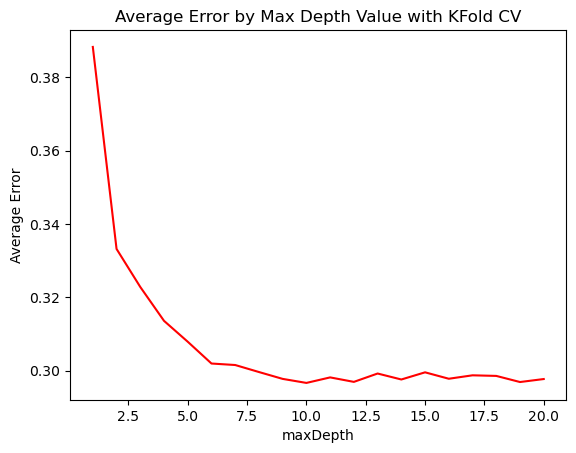

In [26]:
best_nest = 37 # Tuned value

maxDepth_values = range(1, 21)
average_maxDepth_errors = []

for maxDepth in maxDepth_values:
    errors = []
    for train_index, test_index in kf.split(xTrain):
        # Subset Kfold data
        xTrain_fold, xTest_fold = xTrain.iloc[train_index], xTrain.iloc[test_index]
        yTrain_fold, yTest_fold = yTrain.iloc[train_index], yTrain.iloc[test_index]

        model = RandomForestClassifier(n_estimators=best_nest, criterion=best_criterion, max_depth=maxDepth, min_samples_leaf=best_minSamplesLeaf)
        model.fit(xTrain_fold, yTrain_fold)

        # Predict labels and calculate error
        yHat = model.predict(xTest_fold)
        error = np.mean(yHat != yTest_fold)
        errors.append(error)

    average_error = np.mean(errors)
    average_maxDepth_errors.append(average_error)

plt.figure()
plt.plot(maxDepth_values, average_maxDepth_errors, color='red')
plt.xlabel('maxDepth')
plt.ylabel('Average Error')
plt.title('Average Error by Max Depth Value with KFold CV')
plt.savefig('maxDepth_vs_error.png')

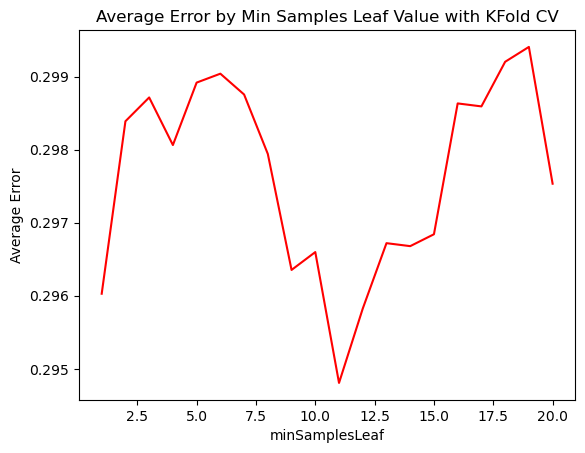

In [29]:
best_maxDepth = 10 # Tuned value

minSamplesLeaf_values = range(1, 21)
average_minSamplesLeaf_errors = []

for minSamplesLeaf in minSamplesLeaf_values:
    errors = []
    for train_index, test_index in kf.split(xTrain):
        # Subset Kfold data
        xTrain_fold, xTest_fold = xTrain.iloc[train_index], xTrain.iloc[test_index]
        yTrain_fold, yTest_fold = yTrain.iloc[train_index], yTrain.iloc[test_index]

        model = RandomForestClassifier(n_estimators=best_nest, criterion=best_criterion, max_depth=best_maxDepth, min_samples_leaf=minSamplesLeaf)
        model.fit(xTrain_fold, yTrain_fold)

        # Predict labels and calculate error
        yHat = model.predict(xTest_fold)
        error = np.mean(yHat != yTest_fold)
        errors.append(error)

    average_error = np.mean(errors)
    average_minSamplesLeaf_errors.append(average_error)

plt.figure()
plt.plot(minSamplesLeaf_values, average_minSamplesLeaf_errors, color='red')
plt.xlabel('minSamplesLeaf')
plt.ylabel('Average Error')
plt.title('Average Error by Min Samples Leaf Value with KFold CV')
plt.savefig('minSamplesLeaf_vs_error.png')

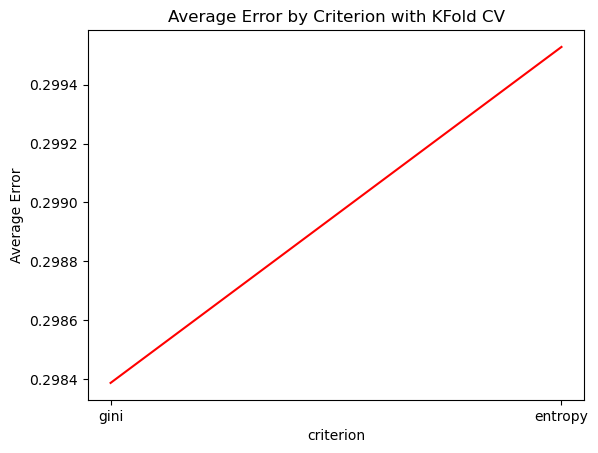

In [63]:
best_minSamplesLeaf = 11 # Tuned value

criterion_values = ['gini', 'entropy']
average_criterion_errors = []

for criterion in criterion_values:
    errors = []
    for train_index, test_index in kf.split(xTrain):
        # Subset Kfold data
        xTrain_fold, xTest_fold = xTrain.iloc[train_index], xTrain.iloc[test_index]
        yTrain_fold, yTest_fold = yTrain.iloc[train_index], yTrain.iloc[test_index]

        model = RandomForestClassifier(n_estimators=best_nest, criterion=criterion, max_depth=best_maxDepth, min_samples_leaf=best_minSamplesLeaf)
        model.fit(xTrain_fold, yTrain_fold)

        # Predict labels and calculate error
        yHat = model.predict(xTest_fold)
        error = np.mean(yHat != yTest_fold)
        errors.append(error)

    average_error = np.mean(errors)
    average_criterion_errors.append(average_error)

plt.figure()
plt.plot(criterion_values, average_criterion_errors, color='red')
plt.xlabel('criterion')
plt.ylabel('Average Error')
plt.title('Average Error by Criterion with KFold CV')
plt.savefig('criterion_vs_error.png')

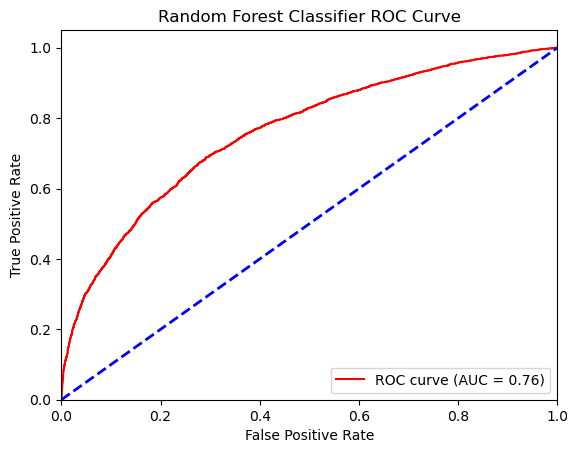

Best Nest Value: 37
Best Max Depth Value: 10
Best Min Samples Leaf Value: 11
Best Criterion Value: gini
Accuracy: 0.7044915012819295
Error: 0.29550849871807044
AUC: 0.7606240963223505


In [6]:
best_criterion = 'gini' # Tuned value

# Final hypertuned model
model = RandomForestClassifier(n_estimators=best_nest, criterion=best_criterion, max_depth=best_maxDepth, min_samples_leaf=best_minSamplesLeaf)
model.fit(xTrain, yTrain)
yHat = model.predict(xTest)

error = np.mean(yHat != yTest)
accuracy = accuracy_score(yTest, yHat)

# ROC curve and AUC
yHat_prob = model.predict_proba(xTest)[:, 1]
fpr, tpr, thresholds = roc_curve(yTest, yHat_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier ROC Curve')
plt.legend(loc='lower right')
plt.savefig('rf_final_roc.png')
plt.show()

print(f'Best Nest Value: {best_nest}')
print(f'Best Max Depth Value: {best_maxDepth}')
print(f'Best Min Samples Leaf Value: {best_minSamplesLeaf}')
print(f'Best Criterion Value: {best_criterion}')
print(f'Accuracy: {accuracy}')
print(f'Error: {error}')
print(f'AUC: {roc_auc}')
